In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US=df[df['job_country']=='United States']
df_skills=df_US.explode('job_skills')

In [4]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [5]:
df_skills_count=df_skills_count.reset_index(name='skills_count')


In [6]:
df_skills_count.sort_values(ascending=False, by='skills_count',inplace=True)

In [7]:
df_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [8]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=job_titles[:3]
job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

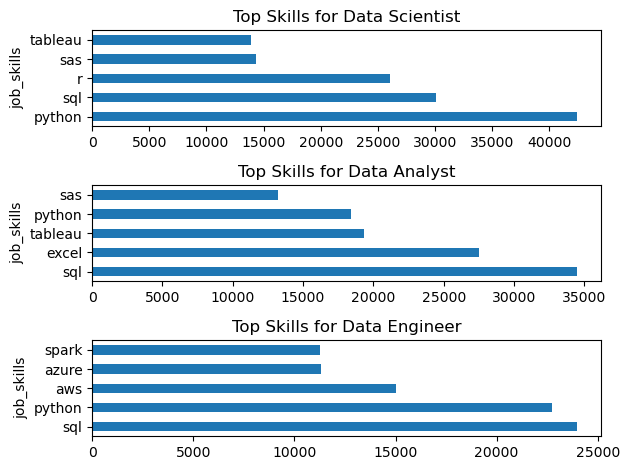

In [9]:
fig,ax=plt.subplots(len(job_titles),1)
for i,job_title in enumerate (job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skills_count',ax=ax[i],legend=False)
    ax[i].set_title(f'Top Skills for {job_title}')
plt.tight_layout()
plt.show()

In [10]:
df_job_count=df_US['job_title_short'].value_counts().reset_index()

In [11]:
df_merged=pd.merge(df_job_count,df_skills_count,how='left',on='job_title_short')
df_merged['percentage']=df_merged['skills_count']/df_merged['count']*100

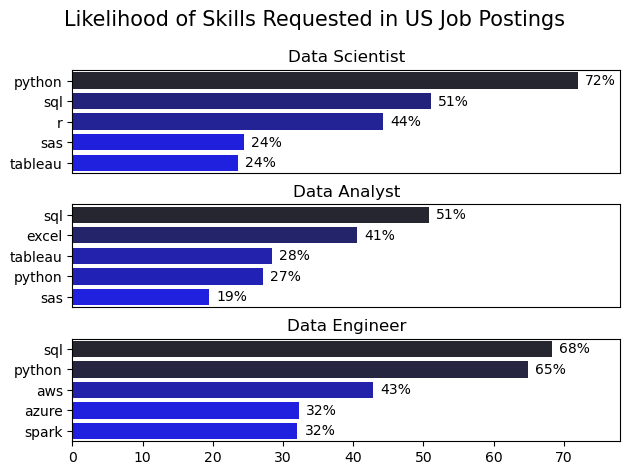

In [15]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='percentage', y='job_skills', ax=ax[i], hue='skills_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()
